In [1]:
"""
텐서플로우 케라스의 Functional API를 사용하는 모델 생성
레이어를 기준으로 입력이 2개 이상이거나 출력이 2개 이상인 모델을 만들 수 있다

"""

'\n텐서플로우 케라스의 Functional API를 사용하는 모델 생성\n레이어를 기준으로 입력이 2개 이상이거나 출력이 2개 이상인 모델을 만들 수 있다\n\n'

In [2]:
import tensorflow as tf
import numpy as np

In [3]:
#mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
"""
원본 mnist 데이터셋은 0~9 까지 숫자를 손글씨로 쓴 이미지(x)와 정답(y) 숫자로 
구성되어 있다
우리는 0~9 까지 숫자를 맞추는 정답외에 홀수인지 짝수인지 판단하는 정답(y_odd)을
새로 만들어서 추가하기로 한다
y_train값이 홀수면 1, 짝수면 0 으로 하는 y_train_odd 배열을 새로만든다
"""
#새로운 출력 값 배열 생성(홀수 1 , 짝수 0)
y_train_odd = []
for y in y_train:
    if y % 2 ==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)
        
y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [5]:
"""
원본 y_train 배열과 홀짝으로 분류한 y_train_odd 배열을 동시에 출력하여 비교해 본다
홀수 짝수 여부가 잘 정리된 것을 확인할 수 있다
"""
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [6]:
"""
검증 데이터셋에 대해서도 홀수, 짝수를 나타내는 y_valid_odd 배열을 만든다
"""
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y % 2 ==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)
    
y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [7]:
"""
입력 이미지 데이터를 255로 나눠서 정규화 한다 
색상이 하나인 모노 컬러 이미지이므로, 새로운 축을 추가하고 채널 개수를 1개로 지정한다
텐서플로우 expand_dims() 함수에 원본 배열을 입력하고, 새롭게 추가하려는 축의 인덱스를 
지정하면 해당 인덱스에 새로운 축이 추가된다 
여기서는 축의 인덱스로 -1을 지정했기 때문에 새로운 축은 끝에 추가된다 
즉, (60000, 28, 28) 배열이 (60000, 28, 28, 1) 배열이 된다
"""
#정규화 (Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
"""
# Functional API로 다중 입력, 다중 출력 레이어 생성

Functional API를 사용하면 사용자가 원하는 복잡한 구조의 모델을 만들 수 있다
앞에서 다른 Sequential API의 경우 레ㅣ어를 층층이 한 줄로 연결할 수 밖에 없지만,
Functional API를 사용하면 다중 입력 또는 다중 출력 같은 구조를 만들 수 있다

다음 코드는 입력 레이어 2개의 출력
conv, pool, flat 다 직접 생성
"""
#Functional API를 사용하여 모델 생성
inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation ="relu")(inputs)
pool = tf.keras.layers.MaxPool2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation="softmax")(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                              

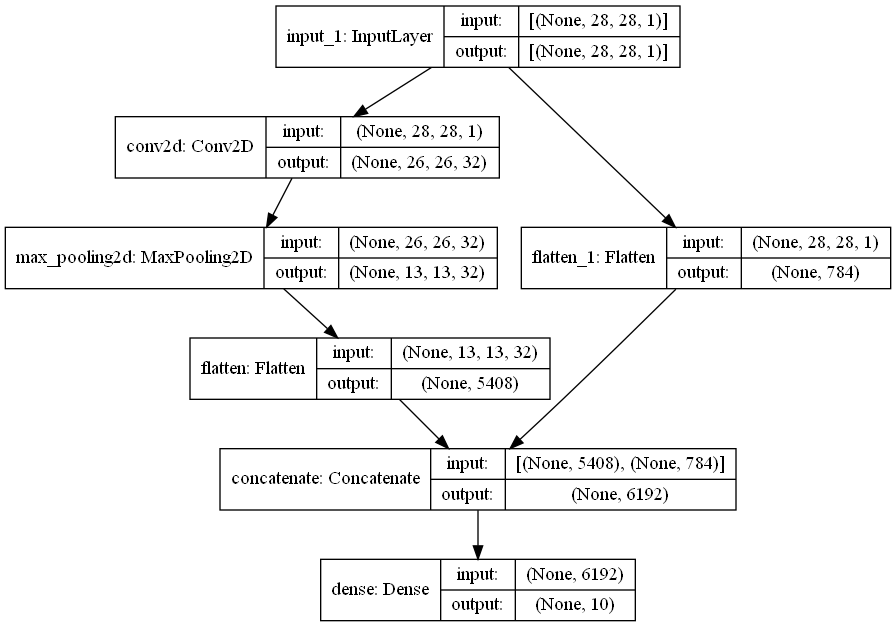

In [9]:
"""
모델 구조를 그래프로 출력
케라스 utils 모듈의 plot_model 함수를 사용하고 
모델을 입력하면 모델 구조를 그려준다 별도의 파일로 저장 할 수도 있다
"""
#모델 구조 출력 및 이미지 파일로 저장
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file="funcional_cnn.png")

In [10]:
"""
다중 분류 모델에 맞게 손실함수와 평가지표를 지정하고, 옵티마이저로는 adam을 사용한다
10epoch에 대한 모델 훈련을 마치고 검증 데이터에 대한 모델의 예측 성능을 평가한다
10개의 숫자 레이블을 마주는 모델의 정확도는 약 98%로서 앞에서 학습했던 Sequential 모델과
큰 차이는 없다
"""
# 모델 컴파일 
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.2079 - accuracy: 0.9406 - val_loss: 0.0849 - val_accuracy: 0.9743
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0803 - accuracy: 0.9766 - val_loss: 0.0647 - val_accuracy: 0.9795
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0591 - accuracy: 0.9825 - val_loss: 0.0590 - val_accuracy: 0.9801
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0480 - accuracy: 0.9852 - val_loss: 0.0642 - val_accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0402 - accuracy: 0.9877 - val_loss: 0.0555 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0576 - val_accuracy: 0.9828
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.0586 - val_accuracy:

In [11]:
# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0551 - accuracy: 0.9845
0.05505112186074257 0.984499990940094


In [12]:
"""
# 다중 출력 분류 모델

이번에는 두가지 서로 다른 분류 문제를 예측하는 다중 출력 모델을 만들어 본다
앞에서 데이터셋을 불러온 후에 홀수, 짝수 정답 재열을 추가해 주었다
다음은 0~9 까지 숫자를 맞추는 분류 문제와
홀수, 짝수를 맞추는 분류 문제를
동시에 풀어내는 모델을 정의하는 코드다
각기 다른 문제에 맞도록 최종 분류기의 출력 레이어를 2개 만드는 것이 핵심이다
"""

'\n# 다중 출력 분류 모델\n\n이번에는 두가지 서로 다른 분류 문제를 예측하는 다중 출력 모델을 만들어 본다\n앞에서 데이터셋을 불러온 후에 홀수, 짝수 정답 재열을 추가해 주었다\n다음은 0~9 까지 숫자를 맞추는 분류 문제와\n홀수, 짝수를 맞추는 분류 문제를\n동시에 풀어내는 모델을 정의하는 코드다\n각기 다른 문제에 맞도록 최종 분류기의 출력 레이어를 2개 만드는 것이 핵심이다\n'

In [13]:
#Functional API를 사용해 모델 생성
inputs = tf.keras.layers.Input(shape=(28, 28, 1), name="inputs")

conv = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", name="conv2d_layer")(inputs)
pool = tf.keras.layers.MaxPool2D((2, 2), name="maxpool_layer")(conv)
flat = tf.keras.layers.Flatten(name = "flatten_layer")(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation="softmax", name="digit_dense")(concat)

odd_outputs = tf.keras.layers.Dense(1, activation="sigmoid", name="odd_dense")(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [14]:
"""
모델의 입력 텐서와 출력 텐서를 화면에 표시한다
입력은 하나이고, 출력은 10개인 텐서와 1개인 테서로 두 개가 확인된다
"""
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


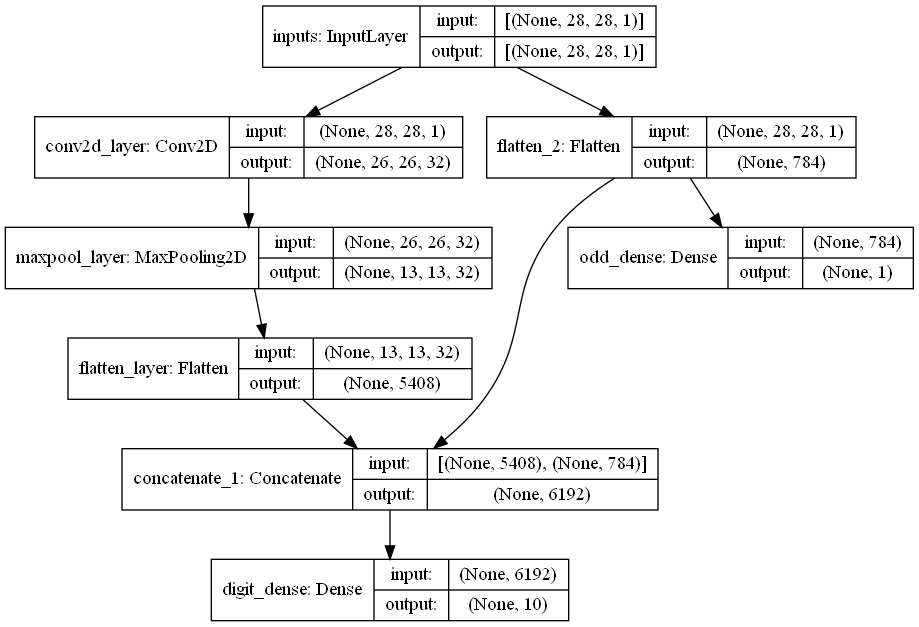

In [15]:
"""
모델 구조를 그림으로 표현
"""
plot_model(model, show_shapes=True, show_layer_names=True, to_file="multi_output_cnn.png")

In [16]:
"""
모델을 컴파일 할 때 주의할 내용이 있다
앞서 모델을 정의할 때 각각의 출력 Dense 레이어에 name 속성으로 "digit_dense", "odd_dense"
와 같은 이름을 지정한 것을 떠올리자
여기서 지정한 이름을 key로 하고, 해당 key에 해당하는 레이어에 적용할 손실함수와 가중치를 
딕셔너리 형태로 지정한다

모델을 훈련시키기 위해 fit() 메소드를 적용할 때도 출력 값을 2개 지정하고,
레이어 이름 속성을 key로 하는 딕셔너리 형태로 각각의 출력에 맞는 정답 배열을 입력해야 한다
검증 데이터셋에 대해서도 마찬가지로 구분해 지정한다
"""

# 모델 컴파일
model.compile(optimizer="adam", loss={"digit_dense": "sparse_categorical_crossentropy", 
                                     "odd_dense": "binary_crossentropy"},
             loss_weights = {"digit_dense":1, "odd_dense": 0.5},
             #loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossengropy
             metrics=["accuracy"])

# 모델 훈련
history = model.fit({"inputs": x_train_in}, {"digit_dense":y_train, "odd_dense":y_train_odd},
                   validation_data = ({"inputs": x_valid_in}, {"digit_dense":y_valid,
                                                              "odd_dense":y_valid_odd}),
                   epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3584 - digit_dense_loss: 0.1958 - odd_dense_loss: 0.3254 - digit_dense_accuracy: 0.9436 - odd_dense_accuracy: 0.8653 - val_loss: 0.2184 - val_digit_dense_loss: 0.0801 - val_odd_dense_loss: 0.2766 - val_digit_dense_accuracy: 0.9758 - val_odd_dense_accuracy: 0.8873
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2114 - digit_dense_loss: 0.0757 - odd_dense_loss: 0.2715 - digit_dense_accuracy: 0.9778 - odd_dense_accuracy: 0.8909 - val_loss: 0.2000 - val_digit_dense_loss: 0.0683 - val_odd_dense_loss: 0.2634 - val_digit_dense_accuracy: 0.9760 - val_odd_dense_accuracy: 0.8960
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1889 - digit_dense_loss: 0.0578 - odd_dense_loss: 0.2623 - digit_dense_accuracy: 0.9824 - odd_dense_accuracy: 0.8962 - val_loss: 0.1899 - val_digit_dense_loss: 0.0596 - val_odd_dense_loss: 0.2606 - val_digit_dense_accuracy: 0.9812 - va

In [17]:
#모델 성능
model.evaluate({"inputs": x_valid_in}, {"digit_dense": y_valid, "odd_dense": y_valid_odd})

313/313 [==============================] - 1s 4ms/step - loss: 0.1926 - digit_dense_loss: 0.0644 - odd_dense_loss: 0.2563 - digit_dense_accuracy: 0.9835 - odd_dense_accuracy: 0.9024


[0.1925724446773529,
 0.06443197280168533,
 0.25628113746643066,
 0.9835000038146973,
 0.902400016784668]

In [18]:
# 홀수 여부를 판단하는 분류기에 레이어를 더 추가해 예측 정확도를 높일 여지가 있다

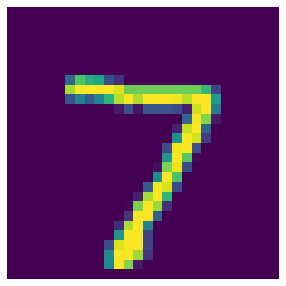

In [19]:
#샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()
    
plot_image(x_valid, 0)

In [20]:
"""
검증 데이터셋의 모든 이미지 데이터를 입력해서 2개의 분류 문제에 대한 예측 확률을 
구하면 다음과 같다. 첫 번째 예측 값은 10개 분류 레이블에 대한 확률을 담고 있고,
두 번째 예측 값은 홀수일 확률을 담고 있다
숫자 7 이미지에 대한 예측 확률을 print 함수로 출력하면 다음과 같다
"""
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

[1.5253930e-12 1.1868387e-11 3.8581884e-09 7.6898800e-08 2.7256460e-13
 6.9954768e-13 2.6531592e-20 9.9999988e-01 9.5354676e-11 7.5736741e-09]
[0.9995714]


In [21]:
"""
넘파이 argmax 함수를 이용하여 예측 확률을 실제 정답 레이블로 변환한다
검증 데이터셋의 첫 10개 이미지에 대한 예측 레이블은 다음과 같고 첫 번째 이미지를 7로 
예측하고 있다
"""
digit_labels = np.argmax(digit_preds, axis = -1)
digit_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [22]:
"""
홀수, 짝수 여부에 대한 예측 레이블을 출력하면 다음과 같다
임계값(threshold)으로 0.5를 지정했는데 홀수일 확률이 0.5보다 큰 경우 
홀수로 분류하기로 한다
"""
odd_labels = (odd_preds > 0.5 ).astype(np.int).reshape(1, -1)[0]
odd_labels[:10]

C:\Users\its_me1\AppData\Local\Temp/ipykernel_48208/625446759.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds > 0.5 ).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

In [23]:
"""
# 전이 학습
앞서 훈련한 모델의 일부를 가져와서 그대로 사용하고, 최종 출력층만 새롭게 추가하여 
모델을 재구성 할 수 있다 
이처럼 기존에 학습된 모델을 활용해 새로운 모델을 만들어 내는 개념을 
Transfer Learning 이라고 부른다

먼저 앞에서 학습한 모델에서 입력 레이어부터 "flatten_layer"라는 name 속성을 갖는 Flatten층까지
해당하는 부분을 따로 추출하여, base_model 객체를 만든다
모델 개요를 출력해서 확인해 보면 (28, 28, 1)이미지를 받아서 5408개의 피처로 특징을 
추출해 출력하는 모델이다
"""
# 앞의 모델 flatten_layer 출력을 추출
base_model_output = model.get_layer("flatten_layer").output

#앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output,
                                  name = "base")
base_model.summary()


Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


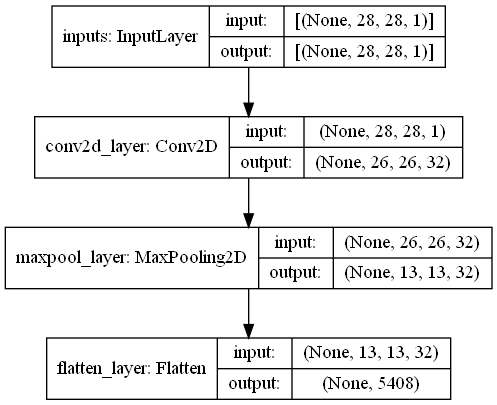

In [24]:
"""
모델 구조 시각화
"""
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file="base_model.png")

In [25]:
"""
Sequential API를 사용하여 앞에서 정의하 base_model을 레이어로 추가하고, 
최종 분류기 역할을 하는 Dense 레이어를 새롭게 이어서 추가해 준다
"""
# Sequential API 적용
digit_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(10, activation="softmax"),
])
digit_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [27]:
"""
모델 구조 확인
노드 10개를 가진 분류기 역할을 하는 Dense 레이어가 추가됨
"""
plot_model(digit_model, show_shapes=True, show_layer_names = True, to_file="digit_model.png")

AssertionError: 

In [28]:
"""
모델 컴파일
"""
# 모델 컴파일 
digit_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train,
                         validation_data=(x_valid_in, y_valid), 
                         epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1313 - accuracy: 0.9630 - val_loss: 0.0586 - val_accuracy: 0.9814
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0572 - accuracy: 0.9833 - val_loss: 0.0550 - val_accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0443 - accuracy: 0.9863 - val_loss: 0.0505 - val_accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0345 - accuracy: 0.9896 - val_loss: 0.0513 - val_accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0493 - val_accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0538 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0193 - accuracy: 0.9941 - val_loss: 0.0517 - val_accuracy:

In [30]:
"""
모델 인스턴스는 trainable 속성을 가지고 있다
이 속성을 False로 지정하면 모델의 파라미터 값이 고정되어 
훈련을 통해서 업데이트 되지 않는다 
이런 방식으로 base_model_frozen을 구성한다
훈련 가능한 파라미터 개수가 0으로 확인
"""
# 베이스 모델의 가중치 고정(Freeze Model)
base_model_frozen = tf.keras.models.Model(inputs=model.input,
                                        outputs= base_model_output,
                                        name = "base_frozen")
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [31]:
"""
이번에는 파라미터를 고정한 base_model_input 모델과 새로운 분류기 역할을 하는 Dense레이어를 
Functional API를 적용하여 구성해 본다. Sequential API로 구성하는 방식과 차이점에 유의한다

총 파라미터 개수는 54410개이고 앞서 고정한 320개의 파라미터는 훈련이 불가능하다는 것이 
표시되어있다. 훈련이 가능한 파라미터는 Flatten 레이어의 출력 5408개와 Dense 레이어의 10개
노드 사이의 가중치만 해당된다
즉 Flatten 레이어 이전에 존재하는 Conv2D 레이어의 파라미터 320개는 
포한되지 않게 된다는 뜻
"""
#Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation="softmax")(base_model_frozen.output)
digit_model_frozen =tf.keras.models.Model(inputs=base_model_frozen.input,
                                         outputs = dense_output)
digit_model_frozen.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [33]:
"""
모델을 컴파일 하고 훈련
"""
#모델 컴파일
digit_model_frozen.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
                          metrics=["accuracy"])

#모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, 
                                validation_data=(x_valid_in, y_valid),
                                epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1167 - accuracy: 0.9680 - val_loss: 0.0542 - val_accuracy: 0.9826
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0492 - accuracy: 0.9854 - val_loss: 0.0580 - val_accuracy: 0.9815
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0514 - val_accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0278 - accuracy: 0.9916 - val_loss: 0.0495 - val_accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0219 - accuracy: 0.9934 - val_loss: 0.0588 - val_accuracy: 0.9826
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.0514 - val_accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0141 - accuracy: 0.9956 - val_loss: 0.0527 - val_accuracy:

In [34]:
"""
모델 전체가 아니라 특정 레이어를 지정하여 파라미터가 업데이트 되지 않도록 고정하는 방법도
가능하다. 다음은 Conv2D 레이어를 취소하고 trainable 속성을 False로 지정하는 예제
"""
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freee Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input,
                                          outputs= base_model_output,
                                          name="base_frozen2")
base_model_frozen2.get_layer("conv2d_layer").trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [35]:
"""
앞에서 고정한 모델에 새로운 분류기 역할을 하는 Dense 레이어를 연결하여 모델을 구성한다
"""
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation="softmax")(base_model_frozen2.output)

digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input,
                                           outputs = dense_output2)
digit_model_frozen2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [36]:
"""
모델 컴파일
"""
# 모델 컴파일 
digit_model_frozen2.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
                           metrics=["accuracy"])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train,
                                 validation_data=(x_valid_in, y_valid),
                                 epochs =10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1136 - accuracy: 0.9689 - val_loss: 0.0555 - val_accuracy: 0.9818
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0482 - accuracy: 0.9857 - val_loss: 0.0504 - val_accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 0.0571 - val_accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0548 - val_accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.0527 - val_accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0178 - accuracy: 0.9946 - val_loss: 0.0573 - val_accuracy: 0.9829
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0148 - accuracy: 0.9957 - val_loss: 0.0519 - val_accuracy: